In [0]:
#1WElmG2-sm61Zz7wA6KEawwNvh_cffeab
#1PCwRx0ZEEIZLnz71fZC2m_I4ND0iIfNv

In [0]:
#dealing with drive Data
import pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#ML Libraries
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
from PIL import Image 
import matplotlib.pyplot as plt
from keras.backend.tensorflow_backend import set_session
from tensorflow.python.client import device_lib
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn import metrics
from sklearn.utils import shuffle
from glob import glob
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics.ranking import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
train_downloaded1 = drive.CreateFile({'id': '1WElmG2-sm61Zz7wA6KEawwNvh_cffeab'})
train_downloaded1.GetContentFile('Zain.zip')
train_downloaded2 = drive.CreateFile({'id': '1PCwRx0ZEEIZLnz71fZC2m_I4ND0iIfNv'})
train_downloaded2.GetContentFile('Zain.csv')


In [0]:
!unzip ./Zain.zip -d /content/zain

Archive:  ./Zain.zip
replace /content/zain/ArASL_Database_54K_Final/ain/AIN (1).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
#os.listdir("../zain/ArASL_Database_54K_Final/thaa")

In [0]:
keras.backend.get_session().run(tf.global_variables_initializer())
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras





Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



Text(0.5, 1.0, 'Distribution of number of images each class')

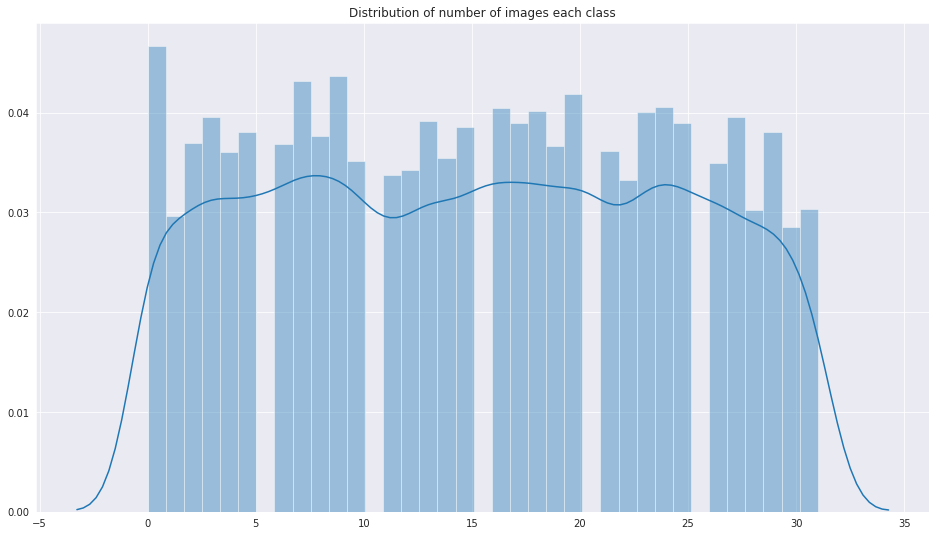

In [0]:
le = LabelEncoder()
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.distplot(le.fit_transform(pd.read_csv("Zain.csv")["Class"]))
plt.title("Distribution of number of images each class")


In [0]:
os.getcwd()

'/content'

In [0]:
def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    letter = 'thaa'
    base_path = '/content/zain/ArASL_Database_54K_Final/' +letter
    os.chdir(base_path)
    img_path = base_path + letter 
    path_contents = os.listdir()
    img1 =cv2.imread(path_contents[0])
    img2 =cv2.imread(path_contents[1])
    img3 =cv2.imread(path_contents[2])
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(img1)
    plt.subplot(132)
    plt.imshow(img2)
    plt.subplot(133)
    plt.imshow(img3)
    return

plot_three_samples('thaa')
os.chdir("../")
os.getcwd()

Samples images for letter thaa


FileNotFoundError: ignored

In [0]:
def preprocess_image(image):
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    return sobely
def make_generator(options):
    validation_split = options.get('validation_split', 0.0)
    preprocessor = options.get('preprocessor', None)
    data_dir = options.get('data_dir', TRAIN_DIR)

    augmentor_options = {
        'samplewise_center': True,
        'samplewise_std_normalization': True,
    }
    if validation_split is not None:
        augmentor_options['validation_split'] = validation_split
    
    if preprocessor is not None:
        augmentor_options['preprocessing_function'] = preprocessor
    
    flow_options = {
        'target_size': TARGET_SIZE,
        'batch_size': BATCH_SIZE,
        'shuffle': options.get('shuffle', None),
        'subset': options.get('subset', None),
    }

    data_augmentor = ImageDataGenerator(**augmentor_options)
    return data_augmentor.flow_from_directory(data_dir, **flow_options)


In [0]:
data_dir = os.getcwd()
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 32
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")



In [0]:
num_category = 32
input_shape = (64,64,3)

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=input_shape ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_category, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [0]:
history =model.fit_generator(train_generator, epochs=2, validation_data=val_generator)

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()


In [0]:
y_val_cat_prob = model.predict_generator(val_generator)

In [0]:
n_classes =y_val_cat_prob.shape[1]
n_set = y_val_cat_prob[0]

In [0]:
onehot_encoder = OneHotEncoder(sparse=False)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [0]:
y_val_cat_prob.shape

In [0]:
type(y_val_cat.argmax(axis=1)[0])

In [0]:
from sklearn.metrics import  accuracy_score , f1_score , balanced_accuracy_score , max_error

#F1 SCORE
f1_score( np.array(y_val_cat.argmax(axis=1)),np.array(y_val_cat_prob.argmax(axis=1)),average="micro")

In [0]:
#ACCURACY SCORE
accuracy_score(np.array(y_val_cat.argmax(axis=1)),  np.array(y_val_cat_prob.argmax(axis=1)))

In [0]:
#BALANCED ACCURACY SCORE
balanced_accuracy_score(np.array(y_val_cat.argmax(axis=1)),  np.array(y_val_cat_prob.argmax(axis=1)))

In [0]:
#MAX ERROR
max_error(np.array(y_val_cat.argmax(axis=1)),  np.array(y_val_cat_prob.argmax(axis=1)))